In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
import datetime as dt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl
from datetime import date
import glob

In [2]:
voters=pd.read_csv("voter_activity_stats.csv")

In [7]:
voters=voters[['district', 'chamber','total_voters',
       'total_dems', 'total_gop',]]

In [16]:
voters['district']=voters.district.str.upper()

C:\Users\c_ull\AppData\Local\Temp\ipykernel_7992\2133697170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voters['district']=voters.district.str.upper()


In [8]:
map1=gpd.read_file("Main_map1voterstats.rar/Main_map1voterstats.shp")


In [12]:
map1=map1[['district','geometry']]

In [18]:
map1=pd.merge(map1,voters)

In [20]:
mail_ballots=pd.read_csv("2022_General_Election_Mail_Ballot_Requests_Department_of_State.csv")

In [22]:
mail_ballots.columns=mail_ballots.columns.str.replace(" ",'_')

In [23]:
mail_ballots['State_House_District']="000"+mail_ballots.State_House_District.str.extract("(\d+)")
mail_ballots['State_House_District']="STH"+mail_ballots.State_House_District.str[-3:]
mail_ballots['State_Senate_District']="00"+mail_ballots.State_Senate_District.str.extract("(\d+)")
mail_ballots['State_Senate_District']="STS"+mail_ballots.State_Senate_District.str[-2:]
mail_ballots['Congressional_District']="00"+mail_ballots.Congressional_District.str.extract("(\d+)")
mail_ballots['Congressional_District']="USC"+mail_ballots.Congressional_District.str[-2:]
mail_ballots['County_Name']=mail_ballots.County_Name.str.upper()
county1=mail_ballots.County_Name.value_counts().to_frame().rename(columns={'County_Name':'MB_req'}).reset_index().rename(columns={'index':'district'})
county1D=mail_ballots[mail_ballots.Applicant_Party_Designation=="D"].County_Name.value_counts().to_frame().rename(columns={'County_Name':'D_MB_req'}).reset_index().rename(columns={'index':'district'})
county1R=mail_ballots[mail_ballots.Applicant_Party_Designation=="R"].County_Name.value_counts().to_frame().rename(columns={'County_Name':'R_MB_req'}).reset_index().rename(columns={'index':'district'})
county_requests=pd.merge(county1,county1D)
county_requests=pd.merge(county_requests,county1R)
county_requests['chamber']='County'
house1=mail_ballots.State_House_District.value_counts().to_frame().rename(columns={'State_House_District':'MB_req'}).reset_index().rename(columns={'index':'district'})
house1D=mail_ballots[mail_ballots.Applicant_Party_Designation=="D"].State_House_District.value_counts().to_frame().rename(columns={'State_House_District':'D_MB_req'}).reset_index().rename(columns={'index':'district'})
house1R=mail_ballots[mail_ballots.Applicant_Party_Designation=="R"].State_House_District.value_counts().to_frame().rename(columns={'State_House_District':'R_MB_req'}).reset_index().rename(columns={'index':'district'})
house_requests=pd.merge(house1,house1D)
house_requests=pd.merge(house_requests,house1R)
house_requests['chamber']='House'
State_Senate_District1=mail_ballots.State_Senate_District.value_counts().to_frame().rename(columns={'State_Senate_District':'MB_req'}).reset_index().rename(columns={'index':'district'})
State_Senate_District1D=mail_ballots[mail_ballots.Applicant_Party_Designation=="D"].State_Senate_District.value_counts().to_frame().rename(columns={'State_Senate_District':'D_MB_req'}).reset_index().rename(columns={'index':'district'})
State_Senate_District1R=mail_ballots[mail_ballots.Applicant_Party_Designation=="R"].State_Senate_District.value_counts().to_frame().rename(columns={'State_Senate_District':'R_MB_req'}).reset_index().rename(columns={'index':'district'})
State_Senate_District_requests=pd.merge(State_Senate_District1,State_Senate_District1D)
State_Senate_District_requests=pd.merge(State_Senate_District_requests,State_Senate_District1R)
State_Senate_District_requests['chamber']='Senate'
Congressional_District1=mail_ballots.Congressional_District.value_counts().to_frame().rename(columns={'Congressional_District':'MB_req'}).reset_index().rename(columns={'index':'district'})
Congressional_District1D=mail_ballots[mail_ballots.Applicant_Party_Designation=="D"].Congressional_District.value_counts().to_frame().rename(columns={'Congressional_District':'D_MB_req'}).reset_index().rename(columns={'index':'district'})
Congressional_District1R=mail_ballots[mail_ballots.Applicant_Party_Designation=="R"].Congressional_District.value_counts().to_frame().rename(columns={'Congressional_District':'R_MB_req'}).reset_index().rename(columns={'index':'district'})
Congressional_District_requests=pd.merge(Congressional_District1,Congressional_District1D)
Congressional_District_requests=pd.merge(Congressional_District_requests,Congressional_District1R)
Congressional_District_requests['chamber']='Congress'
requests_by_district=pd.concat([county_requests,house_requests,State_Senate_District_requests,Congressional_District_requests])
county1=mail_ballots[mail_ballots.Ballot_Returned_Date.notna()].County_Name.value_counts().to_frame().rename(columns={'County_Name':'MB_ret'}).reset_index().rename(columns={'index':'district'})
county1D=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="D")].County_Name.value_counts().to_frame().rename(columns={'County_Name':'D_MB_ret'}).reset_index().rename(columns={'index':'district'})
county1R=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="R")].County_Name.value_counts().to_frame().rename(columns={'County_Name':'R_MB_ret'}).reset_index().rename(columns={'index':'district'})
county_returned=pd.merge(county1,county1D)
county_returned=pd.merge(county_returned,county1R)
county_returned['chamber']='County'
house1=mail_ballots[mail_ballots.Ballot_Returned_Date.notna()].State_House_District.value_counts().to_frame().rename(columns={'State_House_District':'MB_ret'}).reset_index().rename(columns={'index':'district'})
house1D=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="D")].State_House_District.value_counts().to_frame().rename(columns={'State_House_District':'D_MB_ret'}).reset_index().rename(columns={'index':'district'})
house1R=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="R")].State_House_District.value_counts().to_frame().rename(columns={'State_House_District':'R_MB_ret'}).reset_index().rename(columns={'index':'district'})
house_returned=pd.merge(house1,house1D)
house_returned=pd.merge(house_returned,house1R)
house_returned['chamber']='House'
State_Senate_District1=mail_ballots[mail_ballots.Ballot_Returned_Date.notna()].State_Senate_District.value_counts().to_frame().rename(columns={'State_Senate_District':'MB_ret'}).reset_index().rename(columns={'index':'district'})
State_Senate_District1D=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="D")].State_Senate_District.value_counts().to_frame().rename(columns={'State_Senate_District':'D_MB_ret'}).reset_index().rename(columns={'index':'district'})
State_Senate_District1R=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="R")].State_Senate_District.value_counts().to_frame().rename(columns={'State_Senate_District':'R_MB_ret'}).reset_index().rename(columns={'index':'district'})
State_Senate_District_returned=pd.merge(State_Senate_District1,State_Senate_District1D)
State_Senate_District_returned=pd.merge(State_Senate_District_returned,State_Senate_District1R)
State_Senate_District_returned['chamber']='Senate'
congress1=mail_ballots[mail_ballots.Ballot_Returned_Date.notna()].Congressional_District.value_counts().to_frame().rename(columns={'Congressional_District':'MB_ret'}).reset_index().rename(columns={'index':'district'})
congress1D=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="D")].Congressional_District.value_counts().to_frame().rename(columns={'Congressional_District':'D_MB_ret'}).reset_index().rename(columns={'index':'district'})
congress1R=mail_ballots[(mail_ballots.Ballot_Returned_Date.notna())&(mail_ballots.Applicant_Party_Designation=="R")].Congressional_District.value_counts().to_frame().rename(columns={'Congressional_District':'R_MB_ret'}).reset_index().rename(columns={'index':'district'})
Congressional_District_returned=pd.merge(congress1,congress1D)
Congressional_District_returned=pd.merge(Congressional_District_returned,congress1R)
Congressional_District_returned['chamber']='Congress'
returned_by_district=pd.concat([county_returned,house_returned,State_Senate_District_returned,Congressional_District_returned])


In [29]:
map1['chamber']=map1.chamber.str.title()

In [25]:
mail_ballot_stats=pd.merge(returned_by_district,requests_by_district,how='right')

In [31]:
map1=pd.merge(map1,mail_ballot_stats)

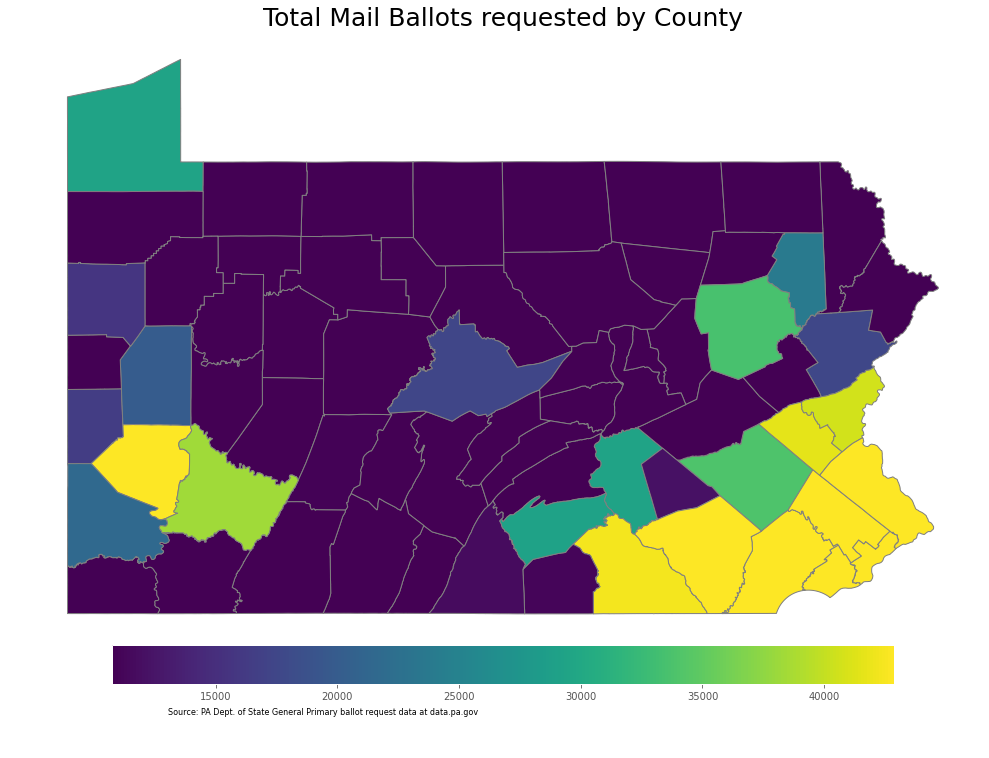

In [44]:
variable='MB_req'
x1=map1[map1.chamber=="County"].MB_req.mean()/2
x2=map1[map1.chamber=="County"].MB_req.mean()*2
vmin=x1
vmax=x2
colormap1='viridis'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.annotate("Source: PA Dept. of State General Primary ballot request data at data.pa.gov",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')

#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
plt.title('Total Mail Ballots requested by County',fontsize=25)
map1[map1.chamber=="County"].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')
plt.savefig("night_before_midterms_pics/Total Mail Ballots requested by County.jpg")

In [47]:
mail_ballots['Ballot_Returned_Date']=pd.to_datetime(mail_ballots.Ballot_Returned_Date,errors='coerce')
mail_ballots['Ballot_Mailed_Date']=pd.to_datetime(mail_ballots.Ballot_Mailed_Date,errors='coerce')
mail_ballots['Application_Approved_Date']=pd.to_datetime(mail_ballots.Application_Approved_Date,errors='coerce')

<AxesSubplot:title={'center':'Applications approved by week'}>

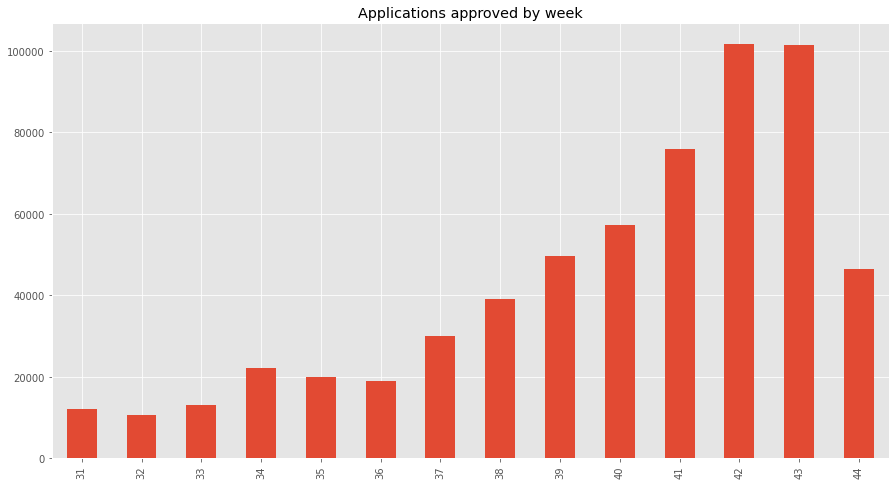

In [69]:
#mail_ballots[(mail_ballots.Application_Approved_Date.dt.year==2022)&(mail_ballots.Application_Approved_Date.dt.month>=8)].Ballot_Returned_Date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar',figsize=(15,8),color='Blue')
mail_ballots[(mail_ballots.Application_Approved_Date.dt.year==2022)&(mail_ballots.Application_Approved_Date.dt.month>=8)].Application_Approved_Date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar',figsize=(15,8),title='Applications approved by week')



In [72]:
map1[map1.chamber=="County"].total_dems.sum()-map1[map1.chamber=="County"].total_gop.sum()

545997.0

In [89]:
f1=voters[voters.chamber=='county']

In [93]:
f1['other_parties']=f1.total_voters-(f1.total_dems+f1.total_gop)

C:\Users\c_ull\AppData\Local\Temp\ipykernel_7992\3942168475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['other_parties']=f1.total_voters-(f1.total_dems+f1.total_gop)


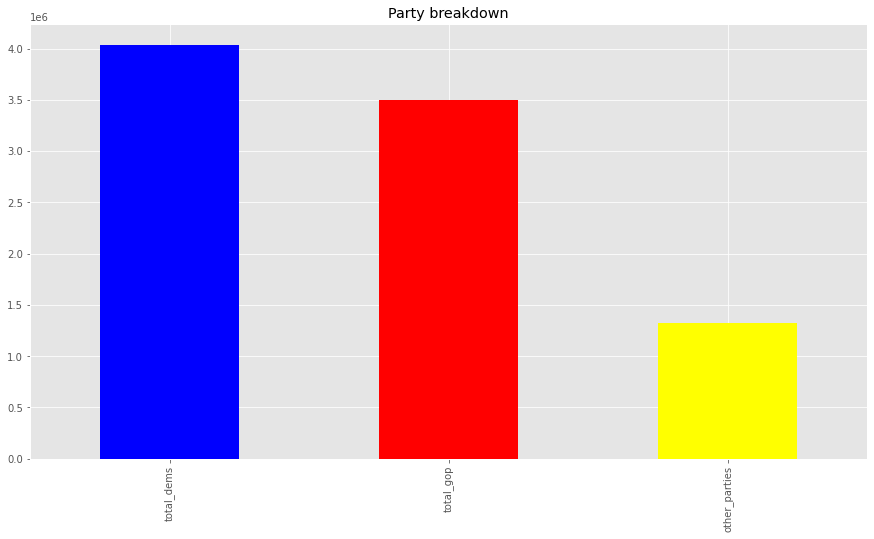

In [103]:
f1[['total_dems','total_gop','other_parties']].sum().plot(kind="bar",color=['Blue','Red','Yellow'],figsize=(15,8),title='Party breakdown')
plt.savefig("night_before_midterms_pics/Party Breakdown.jpg")

In [143]:
map1['DvR']=(map1.total_dems/map1.total_voters)-(map1.total_gop/map1.total_voters)

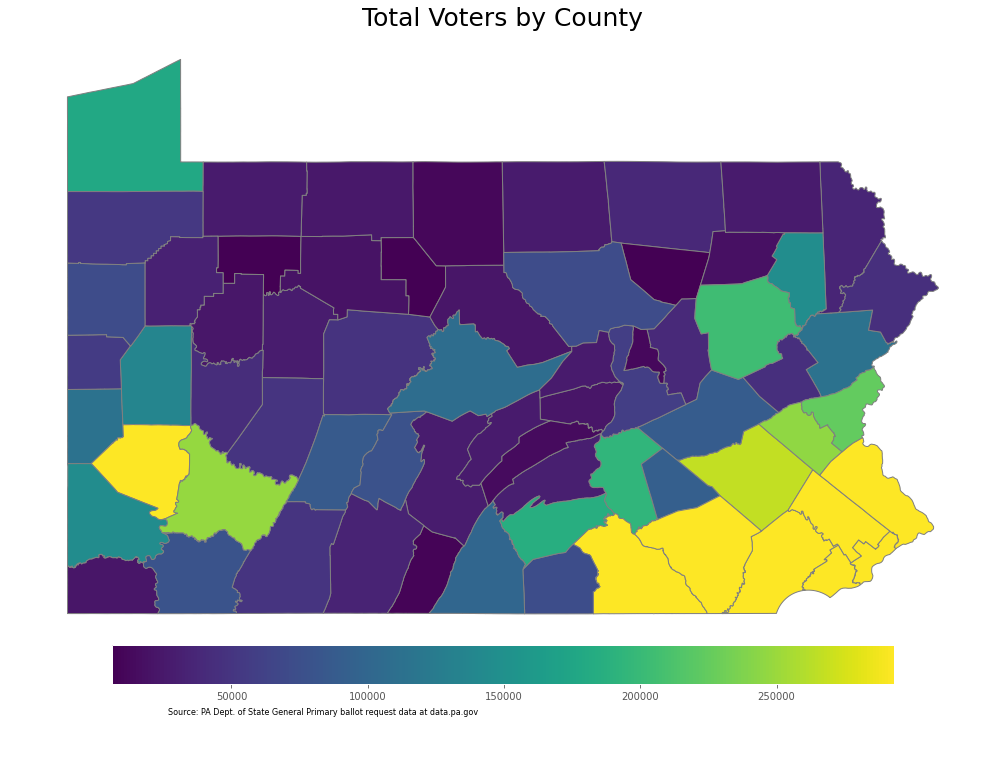

In [119]:
variable='total_voters'
x1=map1[(map1.chamber=="County")].total_voters.min()*2
x2=map1[(map1.chamber=="County")].total_voters.mean()+map1[(map1.chamber=="County")&(map1.district!='PHILADELPHIA')].total_voters.std()
vmin=x1
vmax=x2
colormap1='viridis'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.annotate("Source: PA Dept. of State General Primary ballot request data at data.pa.gov",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')

#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
plt.title('Total Voters by County',fontsize=25)
map1[map1.chamber=="County"].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')
plt.savefig("night_before_midterms_pics/total Voters by County.jpg")

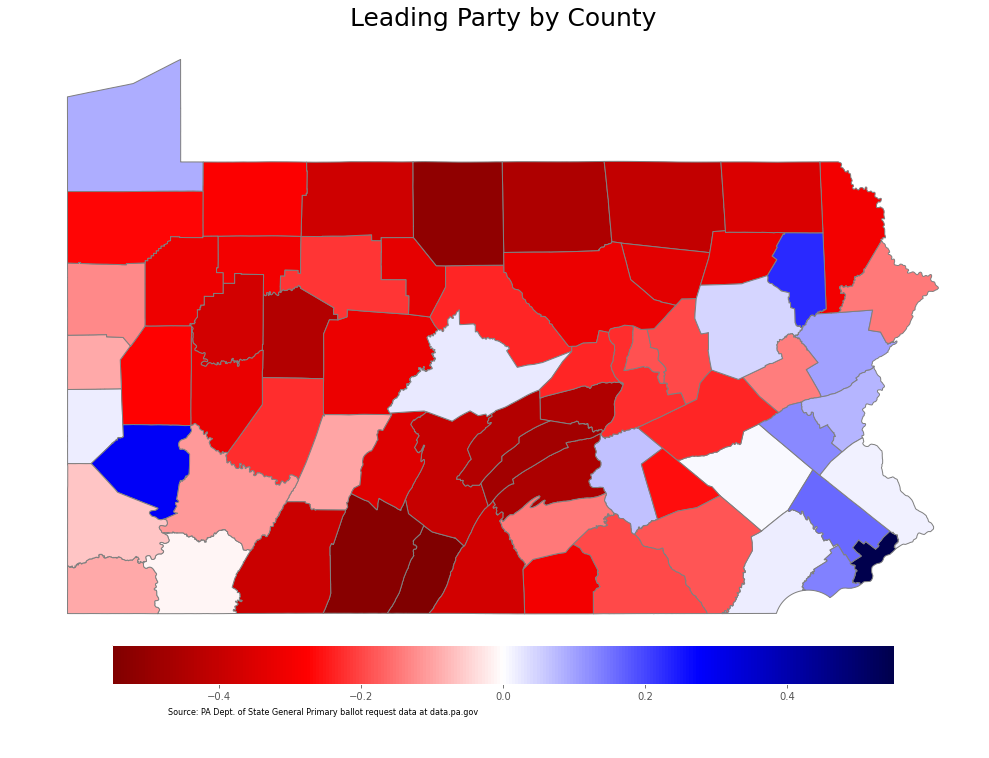

In [147]:
variable='DvR'
x1=map1[(map1.chamber=="County")].DvR.min()
x2=abs(map1[(map1.chamber=="County")].DvR.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.annotate("Source: PA Dept. of State General Primary ballot request data at data.pa.gov",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')

#gdf2.apply(lambda x: ax.annotate(s=x.county_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
plt.title('Leading Party by County',fontsize=25)
map1[map1.chamber=="County"].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')
plt.savefig("night_before_midterms_pics/DVR by County.jpg")

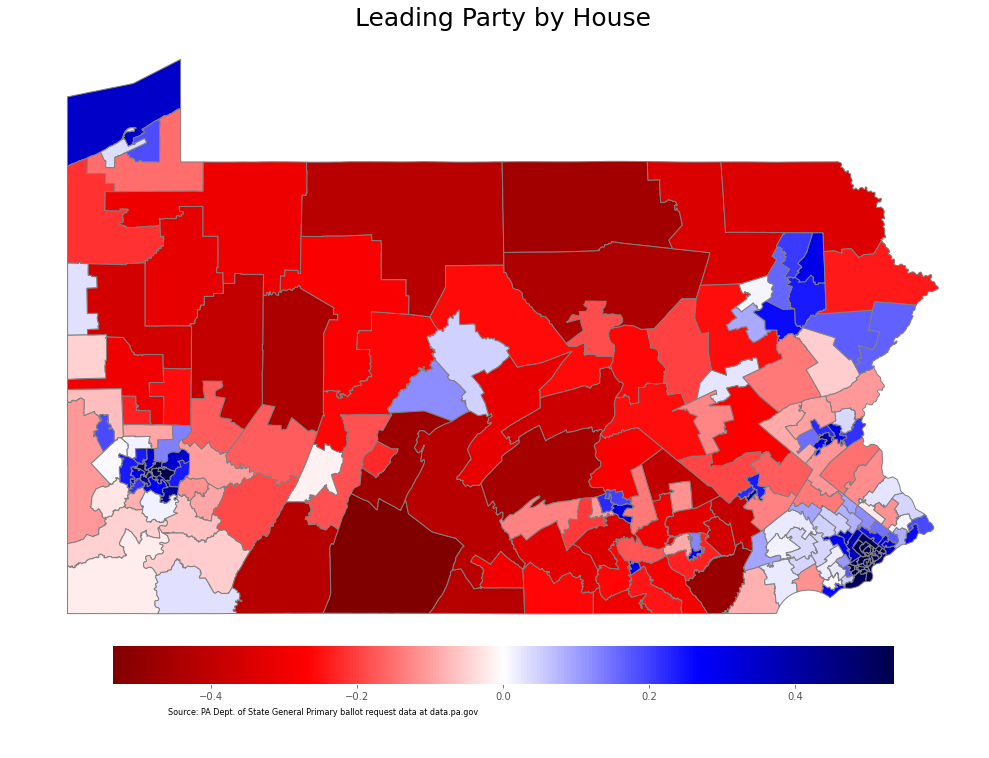

In [153]:
variable='DvR'
x1=map1[(map1.chamber=="House")].DvR.min()
x2=abs(map1[(map1.chamber=="House")].DvR.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.annotate("Source: PA Dept. of State General Primary ballot request data at data.pa.gov",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')

#gdf2.apply(lambda x: ax.annotate(s=x.House_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
plt.title('Leading Party by House',fontsize=25)
map1[map1.chamber=="House"].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')
plt.savefig("night_before_midterms_pics/DVR by House.jpg")

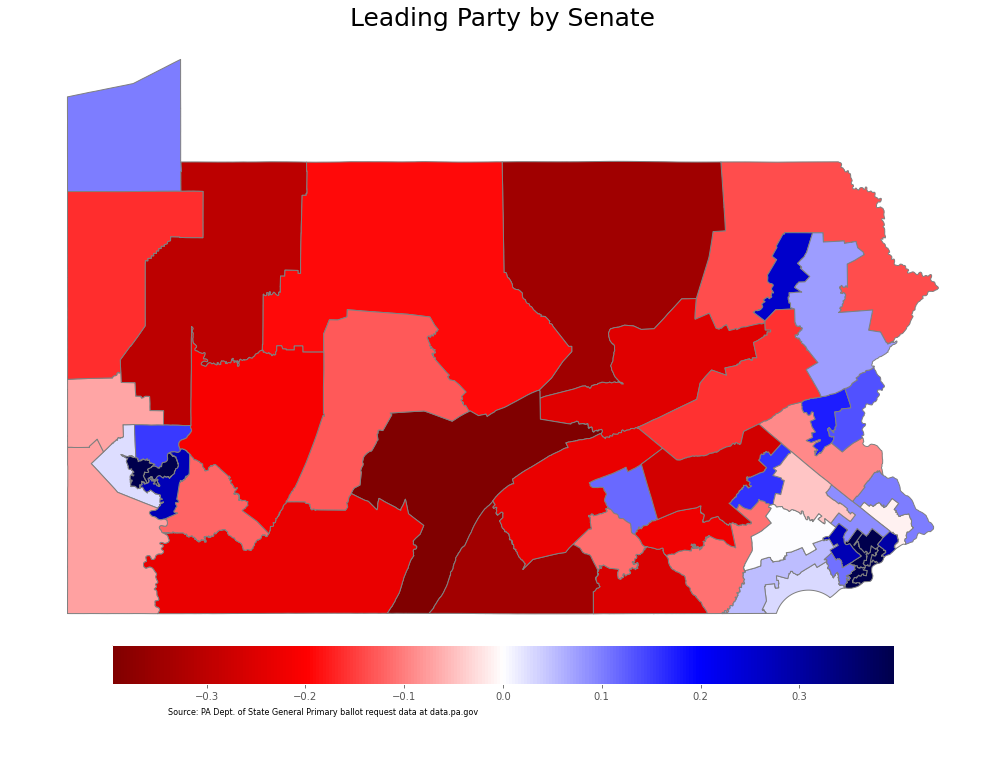

In [161]:
variable='DvR'
x1=map1[(map1.chamber=="Senate")].DvR.min()
x2=abs(map1[(map1.chamber=="Senate")].DvR.min())
vmin=x1
vmax=x2
colormap1='seismic_r'
#colormap1=colors.ListedColormap(['maroon','darkred','firebrick','red','crimson','mediumslateblue','indigo','blue','darkblue','midnightblue'])
#colormap1=colors.ListedColormap(['#FE0000','#FC0202','#DA170A','#DE191E','#DE1190','#45319D','#154FCA','#0555FF','#0567FF'])
fig, ax = plt.subplots(1,figsize=(18,12))
ax.axis("off")
ax.annotate("Source: PA Dept. of State General Primary ballot request data at data.pa.gov",
            xy=(0.13,.05),xycoords='figure fraction',fontsize=8,color='black')

#gdf2.apply(lambda x: ax.annotate(s=x.Senate_name, xy=x.geometry.centroid.coords[0], ha='center',color='#817F7F',fontsize=10),axis=1);
sm = plt.cm.ScalarMappable(cmap=colormap1,
                          norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, orientation='horizontal',fraction=0.06,pad=.005,aspect=20,)
plt.title('Leading Party by Senate',fontsize=25)
map1[map1.chamber=="Senate"].plot(column=variable, cmap=colormap1,vmin=vmin,vmax=vmax,linewidth=1.0,ax=ax,edgecolor='grey')
plt.savefig("night_before_midterms_pics/DVR by Senate.jpg")

In [162]:
map1[(map1.chamber=="Senate")].DvR.describe()

count    50.000000
mean      0.056684
std       0.299932
min      -0.396181
25%      -0.160736
50%       0.013372
75%       0.170374
max       0.765308
Name: DvR, dtype: float64

In [163]:
((map1[(map1.chamber=="Senate")&(map1.DvR>0)].DvR)*100).describe()

count    26.000000
mean     28.045778
std      24.156308
min       0.169664
25%       9.996682
50%      16.704111
75%      51.849345
max      76.530819
Name: DvR, dtype: float64

In [160]:
map1[map1.district.str.contains("151")]

,district,geometry,chamber,total_voters,total_dems,total_gop,MB_ret,D_MB_ret,R_MB_ret,MB_req,D_MB_req,R_MB_req,DvR
167,STH151,"POLYGON ((-75.24798 40.22018, -75.24814 40.220...",House,47878,22950.0,17182.0,8087,5662,1527,10994,7476,2129,0.120473


In [152]:
map1[map1.chamber=='County'].D_MB_req

,district,geometry,chamber,total_voters,total_dems,total_gop,MB_ret,D_MB_ret,R_MB_ret,MB_req,D_MB_req,R_MB_req,DvR
284,PHILADELPHIA,"POLYGON ((-75.28027 39.97496, -75.27951 39.975...",County,1068715,805748.0,120675.0,114814,100605,5636,164424,141502,8521,0.641025
323,ALLEGHENY,"POLYGON ((-79.83925 40.20875, -79.84025 40.208...",County,937693,533276.0,264147.0,151814,117369,22032,190516,144501,28508,0.287012
298,LACKAWANNA,"POLYGON ((-75.44818 41.38768, -75.44818 41.387...",County,146045,81389.0,47560.0,19870,15784,2917,23839,18625,3604,0.231634
312,MONTGOMERY,"POLYGON ((-75.33934 40.33169, -75.33818 40.330...",County,606432,304423.0,205353.0,98588,71143,17316,132946,93571,23954,0.163365
315,DELAWARE,"POLYGON ((-75.34143 39.84611, -75.34165 39.846...",County,414507,206787.0,150480.0,50510,34972,10322,67399,45795,13884,0.135841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,PERRY,"POLYGON ((-77.13295 40.29508, -77.13316 40.295...",County,29870,6256.0,19857.0,2612,1404,1003,3144,1634,1223,-0.455340
309,JUNIATA,"POLYGON ((-77.31803 40.50477, -77.32206 40.502...",County,14019,2951.0,9639.0,1162,574,480,1355,648,575,-0.477067
322,POTTER,"POLYGON ((-77.96282 41.99874, -77.95712 41.998...",County,10985,2043.0,7690.0,869,414,382,955,437,432,-0.514065
288,BEDFORD,"POLYGON ((-78.49347 39.72286, -78.49611 39.722...",County,32959,6174.0,23699.0,2680,1293,1220,3159,1483,1461,-0.531721


In [141]:
((map1[map1.chamber=='County'].groupby('district').total_voters.sum().sort_values(ascending=False)/map1[map1.chamber=='County'].total_voters.sum())*100).head(34)

district
PHILADELPHIA      12.067490
ALLEGHENY         10.588043
MONTGOMERY         6.847580
BUCKS              5.428939
DELAWARE           4.680442
CHESTER            4.302931
LANCASTER          3.966453
YORK               3.515670
BERKS              3.012675
WESTMORELAND       2.803509
LEHIGH             2.769070
NORTHAMPTON        2.537051
LUZERNE            2.309491
DAUPHIN            2.195841
CUMBERLAND         2.104955
ERIE               2.013889
LACKAWANNA         1.649080
WASHINGTON         1.630415
BUTLER             1.544768
MONROE             1.289274
BEAVER             1.284565
CENTRE             1.209419
FRANKLIN           1.127793
LEBANON            1.030978
SCHUYLKILL         1.000965
CAMBRIA            0.972748
FAYETTE            0.897139
BLAIR              0.882630
ADAMS              0.816845
MERCER             0.814632
LYCOMING           0.811843
NORTHUMBERLAND     0.661506
LAWRENCE           0.635739
CRAWFORD           0.597709
Name: total_voters, dtype: float64

In [171]:
map1[map1.chamber=='Senate'].str[]

,district,geometry,chamber,total_voters,total_dems,total_gop,MB_ret,D_MB_ret,R_MB_ret,MB_req,D_MB_req,R_MB_req,DvR
220,STS01,"POLYGON ((-75.09367 39.97436, -75.09637 39.973...",Senate,189779,135235.0,24343.0,28472,24325,1305,40047,33534,1994,0.584322
221,STS02,"POLYGON ((-75.08742 40.06360, -75.08706 40.063...",Senate,141136,101116.0,18683.0,8272,6903,701,13318,10945,1054,0.584068
222,STS03,"POLYGON ((-75.14417 39.98309, -75.14445 39.981...",Senate,172669,141497.0,9352.0,14364,13083,363,21759,19350,671,0.765308
223,STS04,"POLYGON ((-75.05834 40.10589, -75.05920 40.105...",Senate,199887,152921.0,25042.0,31322,27645,1796,42272,36817,2528,0.639756
224,STS05,"POLYGON ((-75.01507 40.13799, -75.01470 40.137...",Senate,149387,86564.0,42224.0,15453,12098,2022,20682,15918,2791,0.296813
225,STS06,"POLYGON ((-75.21413 40.25742, -75.21392 40.257...",Senate,196305,81974.0,84040.0,31568,20727,7692,38930,25087,9542,-0.010524
226,STS07,"POLYGON ((-75.18332 39.96437, -75.18324 39.964...",Senate,192442,147996.0,19420.0,22605,19756,1193,32206,27661,1795,0.668129
227,STS08,"POLYGON ((-75.25129 39.90440, -75.25179 39.903...",Senate,181364,139825.0,19776.0,16834,14952,846,24637,21478,1277,0.661923
228,STS09,"POLYGON ((-75.31853 39.84991, -75.32323 39.849...",Senate,185271,80615.0,75415.0,24936,16143,5781,33510,21067,7950,0.028067
229,STS10,"POLYGON ((-75.26432 40.28684, -75.26309 40.287...",Senate,205619,94722.0,73772.0,36429,24466,7478,45278,29670,9490,0.101887


In [132]:
19+12

31

In [164]:
map2=gpd.read_file("Main_map1voterstats.rar/Main_map1voterstats.shp")

In [169]:
map2[(map2.flip.notna())&(map2.district.str.contains("STS"))]

,district,never_vote,never_vo_1,never_vo_2,chamber,turnout_av,Daverage,Raverage,vote_pres,vote_presD,...,presRpct,presTpct,midDpct,midRpct,midTpct,DvR,flip,current se,midDvRpct,geometry
220,STS01,29333.0,16911.0,4521.0,Senate,3.38,3.78,3.14,82474,64223,...,0.44,0.44,0.27,0.22,0.23,110707.0,Not Up,D,0.05,"POLYGON ((-75.09367 39.97436, -75.09637 39.973..."
222,STS03,31298.0,21201.0,2400.0,Senate,3.53,3.89,2.57,91309,81692,...,0.40,0.53,0.34,0.19,0.30,132163.0,Not Up,D,0.15,"POLYGON ((-75.14417 39.98309, -75.14445 39.981..."
224,STS05,20260.0,10088.0,4414.0,Senate,4.08,4.30,4.59,89307,55058,...,0.64,0.60,0.36,0.38,0.33,44378.0,Not Up,D,-0.02,"POLYGON ((-75.01507 40.13799, -75.01470 40.137..."
226,STS07,29206.0,18908.0,3165.0,Senate,3.95,4.28,3.92,103167,85695,...,0.52,0.54,0.37,0.31,0.33,128433.0,Not Up,D,0.06,"POLYGON ((-75.18332 39.96437, -75.18324 39.964..."
228,STS09,21695.0,10050.0,5862.0,Senate,4.71,4.53,5.56,112702,46905,...,0.70,0.61,0.36,0.48,0.38,5146.0,Not Up,D,-0.12,"POLYGON ((-75.31853 39.84991, -75.32323 39.849..."
229,STS10,22120.0,9263.0,6095.0,Senate,4.69,4.90,5.24,126528,59372,...,0.67,0.62,0.39,0.45,0.38,20974.0,Flip,D,-0.06,"POLYGON ((-75.26432 40.28684, -75.26309 40.287..."
230,STS11,25934.0,12210.0,5317.0,Senate,3.99,3.99,4.96,87263,43491,...,0.67,0.56,0.31,0.43,0.32,24811.0,Not Up,D,-0.12,"POLYGON ((-75.73944 40.57994, -75.73804 40.579..."
232,STS13,23587.0,8626.0,7819.0,Senate,3.84,3.72,4.51,88831,30730,...,0.64,0.56,0.29,0.42,0.33,-17722.0,Not Up,R,-0.13,"POLYGON ((-75.98506 39.93787, -75.98499 39.937..."
234,STS15,30291.0,13977.0,7454.0,Senate,4.09,3.97,5.10,96551,45273,...,0.65,0.54,0.32,0.47,0.34,20763.0,Not Up,R,-0.15,"POLYGON ((-76.89068 40.25011, -76.89081 40.250..."
236,STS17,22920.0,11916.0,4861.0,Senate,4.58,4.69,5.37,102931,57501,...,0.66,0.57,0.37,0.46,0.37,51131.0,Not Up,D,-0.09,"POLYGON ((-75.40434 40.02736, -75.40439 40.027..."
